In [15]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import dask.array as da


In [2]:
hourly = xr.date_range("2025-01-01", "2025-01-02", freq="h")
minute_5 = xr.date_range("2025-01-01", "2025-01-02", freq="5min")


solar = pd.DataFrame({'time_s': hourly, 'solar': np.random.rand(hourly.size)})
air_temperature = pd.DataFrame({'time_a': minute_5, 'air_temperature': np.random.rand(minute_5.size)})
water_temperature = pd.DataFrame({'time_w': minute_5, 'water_temperature': np.random.rand(minute_5.size)})


In [3]:
ds_air = xr.Dataset({
    "air_temperature" : xr.DataArray(
            air_temperature["air_temperature"].values,
            coords={"time": air_temperature["time_a"]},
            dims=("time"),
    )}
)

In [4]:
ds_solar = xr.Dataset({
    "solar_radiation" : xr.DataArray(
            solar["solar"].values,
            coords={"time": solar["time_s"]},
            dims=("time"),
    )
})

In [5]:
ds_solar

<xarray.Dataset>
Dimensions:          (time: 25)
Coordinates:
  * time             (time) datetime64[ns] 2025-01-01 ... 2025-01-02
Data variables:
    solar_radiation  (time) float64 0.3855 0.9037 0.6659 ... 0.3252 0.6577

In [6]:
ds_new = ds_air.merge(ds_solar)

In [7]:
ds_new


<xarray.Dataset>
Dimensions:          (time: 289)
Coordinates:
  * time             (time) datetime64[ns] 2025-01-01 ... 2025-01-02
Data variables:
    air_temperature  (time) float64 0.5648 0.9227 0.09657 ... 0.9192 0.3678
    solar_radiation  (time) float64 0.3855 nan nan nan ... nan nan nan 0.6577

In [8]:
import dask as dd
import dask.dataframe
from pathlib import Path
import datetime

In [10]:
DATA_ROOT = Path(
    r"C:\Users\ptomasula\Repositories\ClearWater-modules\data_temp\sumwere_creek_coarse_p48"
)

DATA_ROOT = Path(
    r"C:\Users\sjordan\OneDrive - LimnoTech\Documents\plane stuff\july 2025\CWR"
)

In [11]:
hourly = xr.date_range("1900-01-01", "2025-01-01", freq="5min")

solar = pd.DataFrame({'time': hourly, 'solar': np.random.rand(hourly.size)})
solar.to_csv("solar.csv", index=False)


KeyboardInterrupt



In [ ]:
%%time
solar = dd.dataframe.read_csv("solar.csv")
solar.loc[solar["time"] > "01-01-2024 00:00:00"].compute()

In [ ]:
import pandas as pd


In [ ]:
f = open("solar.csv", "r")

In [ ]:
%%time

def find_index(read_start, read_end):
    dt = datetime.timedelta(minutes=5)
    start= datetime.datetime(1900, 1, 1)
    read_offset = read_start - start
    read_index = read_offset // dt
    end_offset = read_end - start
    end_index = end_offset // dt
    return read_index+1, end_index+1
    
read_start = datetime.datetime(2024, 9, 1)
read_end = datetime.datetime(2025, 1, 1)
read_index, end_index = find_index(read_start, read_end)
solar_2 = pd.read_csv(f, skiprows=read_index, names=["time","solar"], nrows=end_index - read_index)
solar_2 = solar_2.loc[solar_2["time"] > "01-01-2024 00:00:00"]


In [ ]:
%%time
solar_2 = pd.read_csv("solar.csv")
solar_2 = solar_2.loc[solar_2["time"] > "01-01-2024 00:00:00"]

In [ ]:
solar_2

In [ ]:
inputs = xr.Dataset(
    {
        "solar_radiation": xr.DataArray(
            solar["solar"].values,
            coords={"time": solar["time"]},
            dims=("time"),
        ),
        "air_temperature": xr.DataArray(
            air_temperature["air_temperature"].values,
            coords={"time": air_temperature["time"]},
            dims=("time"),
        ),
    },
    coords={"time": minute_5}
)

In [ ]:
target = datetime(2025,1,1,10,15)

In [ ]:
inputs["solar_radiation"].interpolate_na(dim="time", method="linear")


In [ ]:
inputs

In [ ]:
registry = {
    "var1": None,
    "solar": inputs.solar_radiation,
    "air_temperature": inputs.air_temperature,
    "water_temperature": water_temperature,
}

In [ ]:
import sys

sys.getsizeof(registry)


In [ ]:
ds = registry["solar"]
ds

In [ ]:
ts = hourly[0]
inputs.sel(time=ts)


In [ ]:
#trying to understand zarr

In [ ]:
hourly = xr.date_range("2025-01-01", "2025-01-02", freq="h")
minute_5 = xr.date_range("2025-01-01", "2025-01-02", freq="5min")


solar = pd.DataFrame({'time': hourly, 'solar': np.random.rand(hourly.size)})
air_temperature = pd.DataFrame({'time': minute_5, 'air_temperature': np.random.rand(minute_5.size)})
water_temperature = pd.DataFrame({'time': minute_5, 'water_temperature': np.random.rand(minute_5.size)})


In [ ]:
xr_solar = xr.DataArray(
            solar["solar"].values,
            coords={"time": solar["time"]},
            dims=("time"),
        )

xr_air = xr.DataArray(
            air_temperature["air_temperature"].values,
            coords={"time": air_temperature["time"]},
            dims=("time"),
        )

In [ ]:
xr_solar.to_zarr("met.zarr", append_dim="time")


In [ ]:
xr_air.to_zarr("met.zarr", append_dim="time")

In [ ]:
xr_met = xr.open_zarr("met.zarr")

In [ ]:
xr_met

In [ ]:
inputs = xr.Dataset(
    {
        "solar_radiation": xr.DataArray(
            solar["solar"].values,
            coords={"time": solar["time"]},
            dims=("time"),
        ),
        "air_temperature": xr.DataArray(
            air_temperature["air_temperature"].values,
            coords={"time": air_temperature["time"]},
            dims=("time"),
        ),
    },
    coords={"time": minute_5}
)

In [ ]:
inputs.to_zarr("met.zarr")

In [ ]:
input_read = xr.open_zarr("./met.zarr")
input_read.air_temperature.time



In [ ]:
input_2 = xr.Dataset(
    coords={"time": minute_5}
)

In [ ]:
input_2.to_zarr("met2.zarr")

In [97]:
input_2 = input_2.merge({"air_temperature":xr_air})

In [100]:
input_2.to_zarr("met2.zarr")

ContainsGroupError: path '' contains a group

In [262]:
import dask.array as da

### Variable based approach

In [293]:
start_time = "2022-05-14 00:00:00"
end_time = "2022-05-15 00:00:00"
time_step = "30s"
time = pd.date_range(start=start_time, end=end_time, freq=time_step)

meterological_template = xr.Dataset(
    #{v : (("time"), da.empty(time.shape[0], dtype="float")) for v in meterological_variables},
    data_vars={},
    coords={"time": time},
)

In [294]:
file = "met2.zarr"
meterological_template.to_zarr(file, compute=False, mode='w')

Delayed('_finalize_store-d523ebde-edee-4c6e-9892-eefe861f25ba')

In [295]:
air = pd.DataFrame({'time': time, 'air_temperature': np.random.rand(time.size)})
#xr_air = xr.Dataset({'air_temperature': xr.DataArray(air['air_temperature'], dims=['time'], coords={'time': time})})
xr_air =xr.DataArray(air['air_temperature'], dims=['time'], coords={'time': time})

In [300]:
#try writing a piece
xr_air.to_zarr(f'{file}', mode="a")

In [301]:
met2 = xr.open_zarr(file)

In [305]:
met2

<xarray.Dataset> Size: 46kB
Dimensions:          (time: 2881)
Coordinates:
  * time             (time) datetime64[ns] 23kB 2022-05-14 ... 2022-05-15
Data variables:
    air_temperature  (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>

### Template Approach

In [96]:
start_time = "2022-05-14 00:00:00"
end_time = "2022-05-15 00:00:00"
time_step = "30s"
time = pd.date_range(start=start_time, end=end_time, freq=time_step)

meterological_variables = [
    "air_temperature",
    "solar_radiation",
    "cloudiness",
    "wind_speed",
    "atmospheric_pressure",
    "atmospheric_vapor_pressure",
    "sediment_temperature",
    "sediment_thickness",
]

meterological_template = xr.Dataset(
    {v : (("time"), da.empty(time.shape[0], dtype="float")) for v in meterological_variables},
    coords={"time": time},
)

In [97]:
meterological_template.air_temperature

<xarray.DataArray 'air_temperature' (time: 2881)>
dask.array<empty_like, shape=(2881,), dtype=float64, chunksize=(2881,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2022-05-14 2022-05-14T00:00:30 ... 2022-05-15

In [98]:
file = "met.zarr"
meterological_template.to_zarr(file, compute=False, mode='w-')

Delayed('_finalize_store-b466cc96-ddd7-45c4-b08f-8cab34c695c2')

### Try Using the Zarr Package to Write to Groups

This option may be fastest- looks like only air temperature gets written, and not the time coordinate.

In [99]:
import zarr

In [100]:
%%time
file = "met_grouped.zarr"
meterological_template.to_zarr(file, mode='w')

CPU times: total: 172 ms
Wall time: 433 ms


In [101]:
root = zarr.open_group(file, mode='r+')
root['air_temperature'][:] = np.random.rand(len(root['time']))

In [102]:
%%time
met = xr.open_zarr(file)
met

CPU times: total: 15.6 ms
Wall time: 22 ms


<xarray.Dataset>
Dimensions:                     (time: 2881)
Coordinates:
  * time                        (time) datetime64[ns] 2022-05-14 ... 2022-05-15
Data variables:
    air_temperature             (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    atmospheric_pressure        (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    atmospheric_vapor_pressure  (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    cloudiness                  (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    sediment_temperature        (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    sediment_thickness          (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    solar_radiation             (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    wind_speed                  (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>

In [103]:
%%time
met.air_temperature.values

CPU times: total: 31.2 ms
Wall time: 3 ms


array([0.52882383, 0.66927133, 0.91776049, ..., 0.70770731, 0.55423075,
       0.44114586])

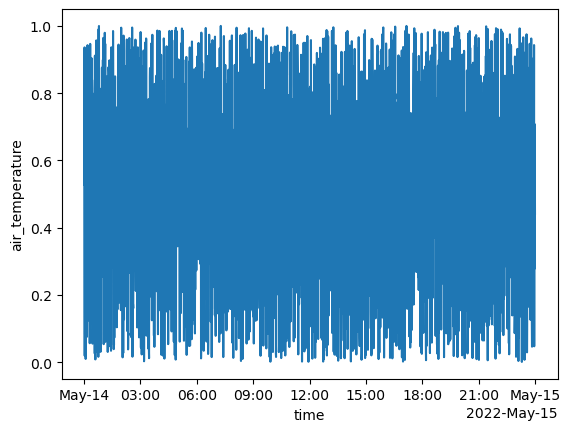

In [104]:
met.air_temperature.plot()

### Try Using To_Zarr

this option may be a little slower -- time coordinate gets re-written with variable. 

In [81]:
%%time
file = "met_to_zarr2.zarr"
meterological_template.to_zarr(file, compute=False, mode='w-')

CPU times: total: 172 ms
Wall time: 432 ms


Delayed('_finalize_store-5f85fc5c-b424-4134-be3e-e968ac41a29a')

In [82]:
air_temp = xr.Dataset(
    {"air_temperature": ("time", np.random.rand(len(time)))},
    coords={"time": time}
)

In [83]:
air_temp

<xarray.Dataset>
Dimensions:          (time: 2881)
Coordinates:
  * time             (time) datetime64[ns] 2022-05-14 ... 2022-05-15
Data variables:
    air_temperature  (time) float64 0.1328 0.4439 0.8938 ... 0.4691 0.05592

In [77]:
file

'met_to_zarr.zarr'

In [93]:
%%time
air_temp.to_zarr(file, mode='r+')

CPU times: total: 15.6 ms
Wall time: 30.9 ms


In [94]:
%%time
met = xr.open_zarr(file)
met

CPU times: total: 15.6 ms
Wall time: 17.7 ms


<xarray.Dataset>
Dimensions:                     (time: 2881)
Coordinates:
  * time                        (time) datetime64[ns] 2022-05-14 ... 2022-05-15
Data variables:
    air_temperature             (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    atmospheric_pressure        (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    atmospheric_vapor_pressure  (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    cloudiness                  (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    sediment_temperature        (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    sediment_thickness          (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    solar_radiation             (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>
    wind_speed                  (time) float64 dask.array<chunksize=(2881,), meta=np.ndarray>

In [95]:
%%time
met.air_temperature.values

CPU times: total: 0 ns
Wall time: 3.52 ms


array([0.13281426, 0.44390797, 0.89376757, ..., 0.47596855, 0.46914346,
       0.05591821])

In [278]:
air = pd.DataFrame({'time': time, 'air_temperature': np.random.rand(time.size)})
#xr_air = xr.Dataset({'air_temperature': xr.DataArray(air['air_temperature'], dims=['time'], coords={'time': time})})
xr_air =xr.DataArray(air['air_temperature'], dims=['time'], coords={'time': time})

In [283]:
xr_air.values

array([0.1112695 , 0.59240717, 0.72709187, ..., 0.82872759, 0.56322611,
       0.94545051], shape=(2881,))

In [200]:
met["air_temperature"] = xr_air


In [ ]:
met = xr.open_zarr(file)
met

In [291]:
#try writing a piece
xr_air.to_zarr(f'{file}/air_temperature', mode="w")

In [285]:
met = xr.open_zarr(file)

In [292]:
met

<xarray.Dataset> Size: 207kB
Dimensions:                     (time: 2881)
Coordinates:
  * time                        (time) datetime64[ns] 23kB 2022-05-14 ... 202...
Data variables:
    air_temperature             (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    atmospheric_pressure        (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    atmospheric_vapor_pressure  (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    cloudiness                  (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    sediment_temperature        (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    sediment_thickness          (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    solar_radiation             (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>
    wind_speed                  (time) float64 23kB dask.array<chunksize=(2881,), meta=np.ndarray>

In [287]:
met.air_temperature.time


<xarray.DataArray 'time' (time: 2881)> Size: 23kB
array(['2022-05-14T00:00:00.000000000', '2022-05-14T00:00:30.000000000',
       '2022-05-14T00:01:00.000000000', ..., '2022-05-14T23:59:00.000000000',
       '2022-05-14T23:59:30.000000000', '2022-05-15T00:00:00.000000000'],
      shape=(2881,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 23kB 2022-05-14 ... 2022-05-15

In [288]:
met.air_temperature.values

array([nan, nan, nan, ..., nan, nan, nan], shape=(2881,))